Import the libraries and load the data

In [120]:
# import libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [121]:
# load the csv file
calendar = pd.read_csv('./calendar.csv')
original_listing = pd.read_csv('./listings.csv')
listing=original_listing.copy()
reviews = pd.read_csv('./reviews.csv')

Exploring the data

In [122]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [123]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [124]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [125]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [126]:
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [127]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


Data cleaning:
Main Problems:
- prices are "object" pandas type (str or mixed) -> we want float
- dates are "object" pandas type (str or mixed) -> we want Date
- zipcode are "object" pandas type (str or mixed) -> we want int
- handling null (NaN) values
- boolean values t/f -> we want 1/0

Cleaning calendar dataframe:

In [128]:
def format_prices(dataframe,columns):
    for colum in columns:
        dataframe[colum] = dataframe[colum].replace({'\$':''}, regex=True)
        dataframe[colum] = dataframe[colum].replace({',':''}, regex=True)
        dataframe[colum]= dataframe[colum].astype(float)
    return dataframe

In [129]:
# remove the dollar sign and the comma
calendar = format_prices(calendar,['price'])

# convert t / f to 1 and 0
calendar["available"] = calendar["available"].replace({'t': 1, 'f': 0})

# convert to datetime
calendar['date'] = pd.to_datetime(calendar['date'])
#check types after that
calendar.dtypes

listing_id             int64
date          datetime64[ns]
available              int64
price                float64
dtype: object

In [130]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,1,85.0
1,241032,2016-01-05,1,85.0
2,241032,2016-01-06,0,NaN
3,241032,2016-01-07,0,NaN
4,241032,2016-01-08,0,NaN


In [131]:
# we select the columns we want to keep. (we discarded some of them like "squere feet" due to the lack of information
columns_list_keep=['id','host_id', 'neighbourhood_cleansed','neighbourhood_group_cleansed', 'city', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities',
       'price', 'cleaning_fee', 'guests_included', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'cancellation_policy',
       'reviews_per_month']

listing=listing[columns_list_keep]

# few have nan as bathrooms and bedrooms. I'll set the default value to 0. Could be a studio apartment or a room in a house without the private bathroom
listing['bathrooms'] = listing['bathrooms'].fillna(0)
listing['bedrooms'] = listing['bedrooms'].fillna(0)
# there are few nan property type. We can set a default value "Other" not to lose them.
listing['property_type'] = listing['property_type'].fillna("Other")

# set the default cleaning_fee to 0
listing['cleaning_fee'] = listing['cleaning_fee'].fillna("$0")
# remove the locations without reviews
listing =listing[~listing['review_scores_rating'].isna()]
# remove the dollar sign and the comma
listing = format_prices(listing, ['price', 'cleaning_fee'])

listing.head()

,id,host_id,neighbourhood_cleansed,neighbourhood_group_cleansed,city,latitude,longitude,property_type,room_type,accommodates,...,amenities,price,cleaning_fee,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month
0,241032,956883,West Queen Anne,Queen Anne,Seattle,47.636289,-122.371025,Apartment,Entire home/apt,4,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,0.0,2,1,365,207,95.0,moderate,4.07
1,953595,5177328,West Queen Anne,Queen Anne,Seattle,47.639123,-122.365666,Apartment,Entire home/apt,4,...,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,40.0,1,2,90,43,96.0,strict,1.48
2,3308979,16708587,West Queen Anne,Queen Anne,Seattle,47.629724,-122.369483,House,Entire home/apt,11,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,300.0,10,4,30,20,97.0,strict,1.15
4,278830,1452570,West Queen Anne,Queen Anne,Seattle,47.632918,-122.372471,House,Entire home/apt,6,...,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,125.0,6,1,1125,38,92.0,strict,0.89
5,5956968,326758,West Queen Anne,Queen Anne,Seattle,47.630525,-122.366174,House,Private room,2,...,"{""Wireless Internet"",""Free Parking on Premises...",120.0,40.0,1,1,6,17,95.0,strict,2.45


In [132]:
listing.dtypes

id                                int64
host_id                           int64
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
city                             object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
accommodates                      int64
bathrooms                       float64
bedrooms                        float64
beds                            float64
bed_type                         object
amenities                        object
price                           float64
cleaning_fee                    float64
guests_included                   int64
minimum_nights                    int64
maximum_nights                    int64
number_of_reviews                 int64
review_scores_rating            float64
cancellation_policy              object
reviews_per_month               float64
dtype: object

DATA VISUALIZATION:

In [133]:
total_apt = len(listing)
# I don't want to use the default "Other neighborhoods" but I'll take the name of the neighborhoods instead of the group name
listing['neighbourhood_group_cleansed'] = np.where(listing['neighbourhood_group_cleansed']=="Other neighborhoods",listing['neighbourhood_cleansed'],listing['neighbourhood_group_cleansed'])

In [134]:
def plot_graphs_location_distribution(listing,name="0"):
    neighbourhood_count = listing['neighbourhood_group_cleansed'].value_counts()
    neighbourhood_count = neighbourhood_count.to_frame().reset_index()
    neighbourhood_count = neighbourhood_count.rename({'index':'neighbourhood_group_cleansed', 'neighbourhood_group_cleansed':'count'}, axis=1)


    color_labels = list(neighbourhood_count['neighbourhood_group_cleansed'].unique())
    # List of colors in the color palettes
    rgb_values = sns.color_palette(cc.glasbey, len(color_labels))


    # Map continents to the colors
    color_map = dict(zip(color_labels, rgb_values))
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(30, 12), dpi=80)
    for neighborhood in color_labels:
        x = listing[listing['neighbourhood_group_cleansed'] == neighborhood]
        axes[0].scatter(x=x['longitude'],y=x['latitude'] , color = color_map[neighborhood], label = neighborhood)
    #ax.scatter(x=listing['longitude'],y=listing['latitude'] , c=listing['neighbourhood_group_cleansed'].map(color_map))
    axes[0].axis('equal')
    axes[0].legend()
    axes[0].set_xlabel('Longitude')
    axes[0].set_ylabel('Latitude')
    axes[0].set_title('Location in Seattle')


    axes[1].bar(neighbourhood_count['neighbourhood_group_cleansed'], neighbourhood_count['count'], color=rgb_values)
    axes[1].set_xlabel('Neighbourhood Group')
    axes[1].set_ylabel('# of Location')
    axes[1].set_title('Distribution Among Neighborhood')

    plt.xticks(rotation=45,ha='right')

    fig.savefig('./seattle_map_{}.png'.format(name))
    return neighbourhood_count.head(4)

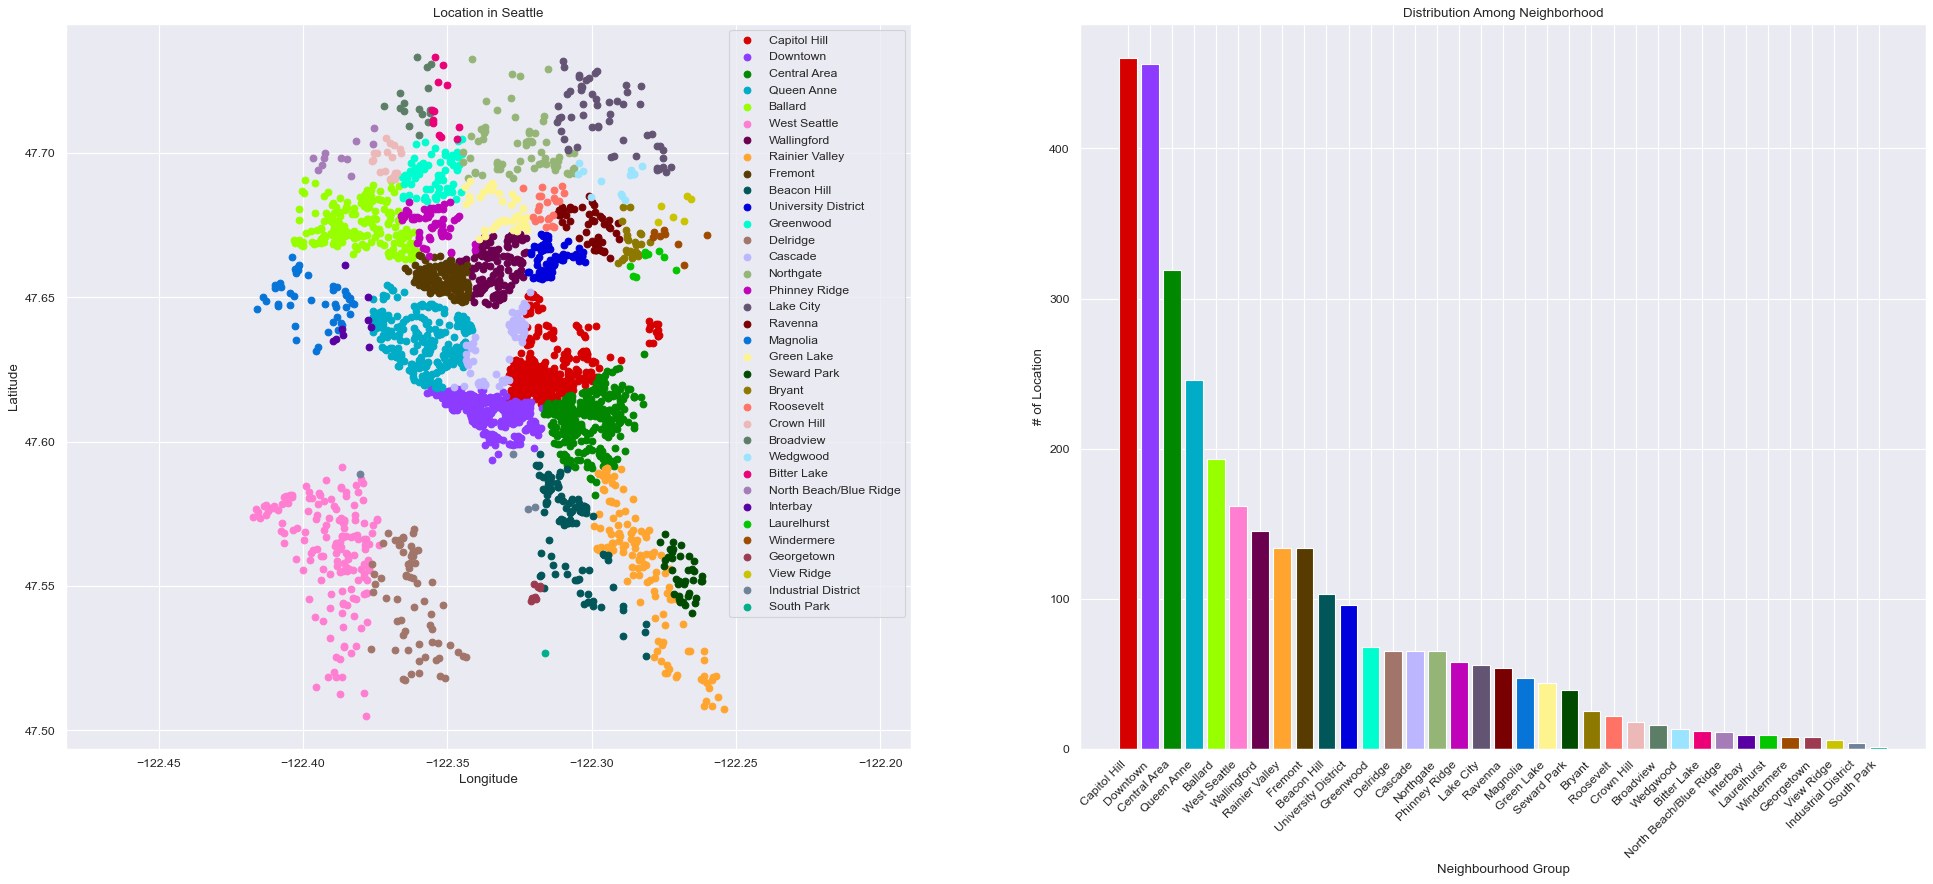

In [135]:
top_4 = plot_graphs_location_distribution(listing, "all")

We can see from the two graphs that the areas with the higher apartment/houses in AirBnB are situate in the center of Seattle and they are:


In [136]:
top_4

,neighbourhood_group_cleansed,count
0,Capitol Hill,460
1,Downtown,456
2,Central Area,319
3,Queen Anne,246


In [137]:
new_listing = listing[listing["neighbourhood_group_cleansed"].isin(["Capitol Hill", "Central Area", "Downtown", "Queen Anne"])]

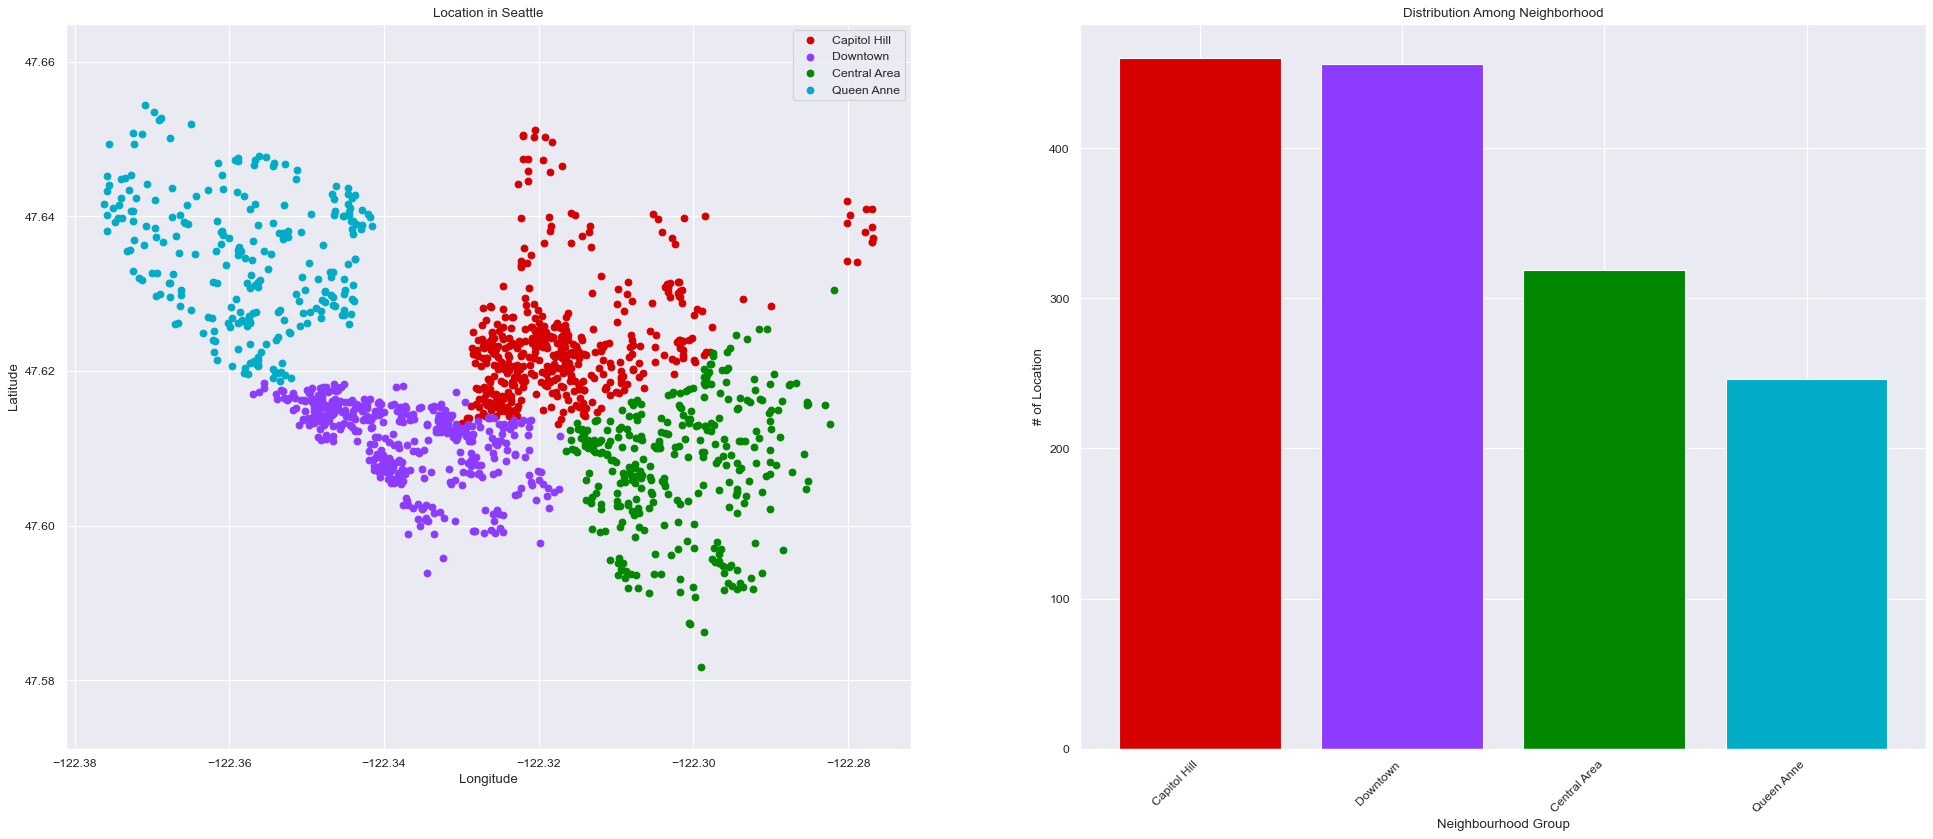

In [138]:
top_4 = plot_graphs_location_distribution(new_listing,"top_4")

In [139]:
print(total_apt)

3171


In [140]:
print("Top 4 areas coverage : {:.2f}%".format(100*top_4.sum().values[1]/total_apt))

Top 4 areas coverage : 46.70%


In [141]:
print(list(top_4["neighbourhood_group_cleansed"].unique()))

['Capitol Hill', 'Downtown', 'Central Area', 'Queen Anne']


Now we want to check if there is a correlation between the numerical features. To check also the categorical features we need to dummify them.

In [142]:
def correlation_matrix(df,columns,name="0"):
    for c in columns:
        df[c].fillna(0, inplace=True)
        df[c]=df[c].apply(pd.to_numeric, errors='raise')

    #Find out correlation between columns and plot
    corrs = np.corrcoef(df[columns].values.T)
    sns.set(font_scale=1)
    sns.set(rc={'figure.figsize':(20,20)})
    hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
                  yticklabels = columns, xticklabels = columns).set_title('Correlations heatmap')

    fig = hm.get_figure()
    fig.savefig('correlations_{}.png'.format(name))
    return corrs

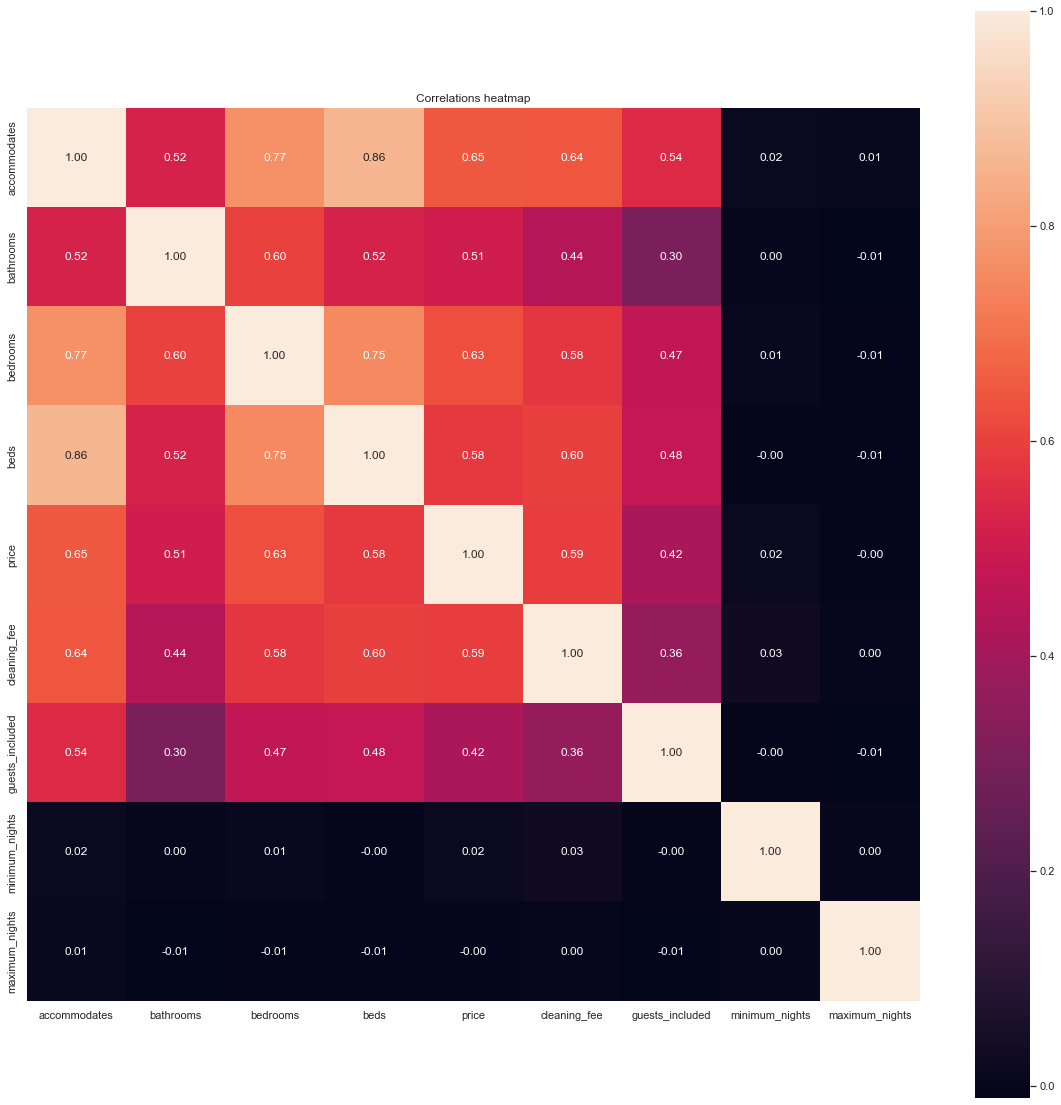

In [143]:
col_corr=["accommodates", "bathrooms", "bedrooms", "beds", "price", "cleaning_fee", "guests_included", "minimum_nights", "maximum_nights"]#, "number_of_reviews", "review_scores_rating"]
corr_matx=correlation_matrix(listing,col_corr,"base")

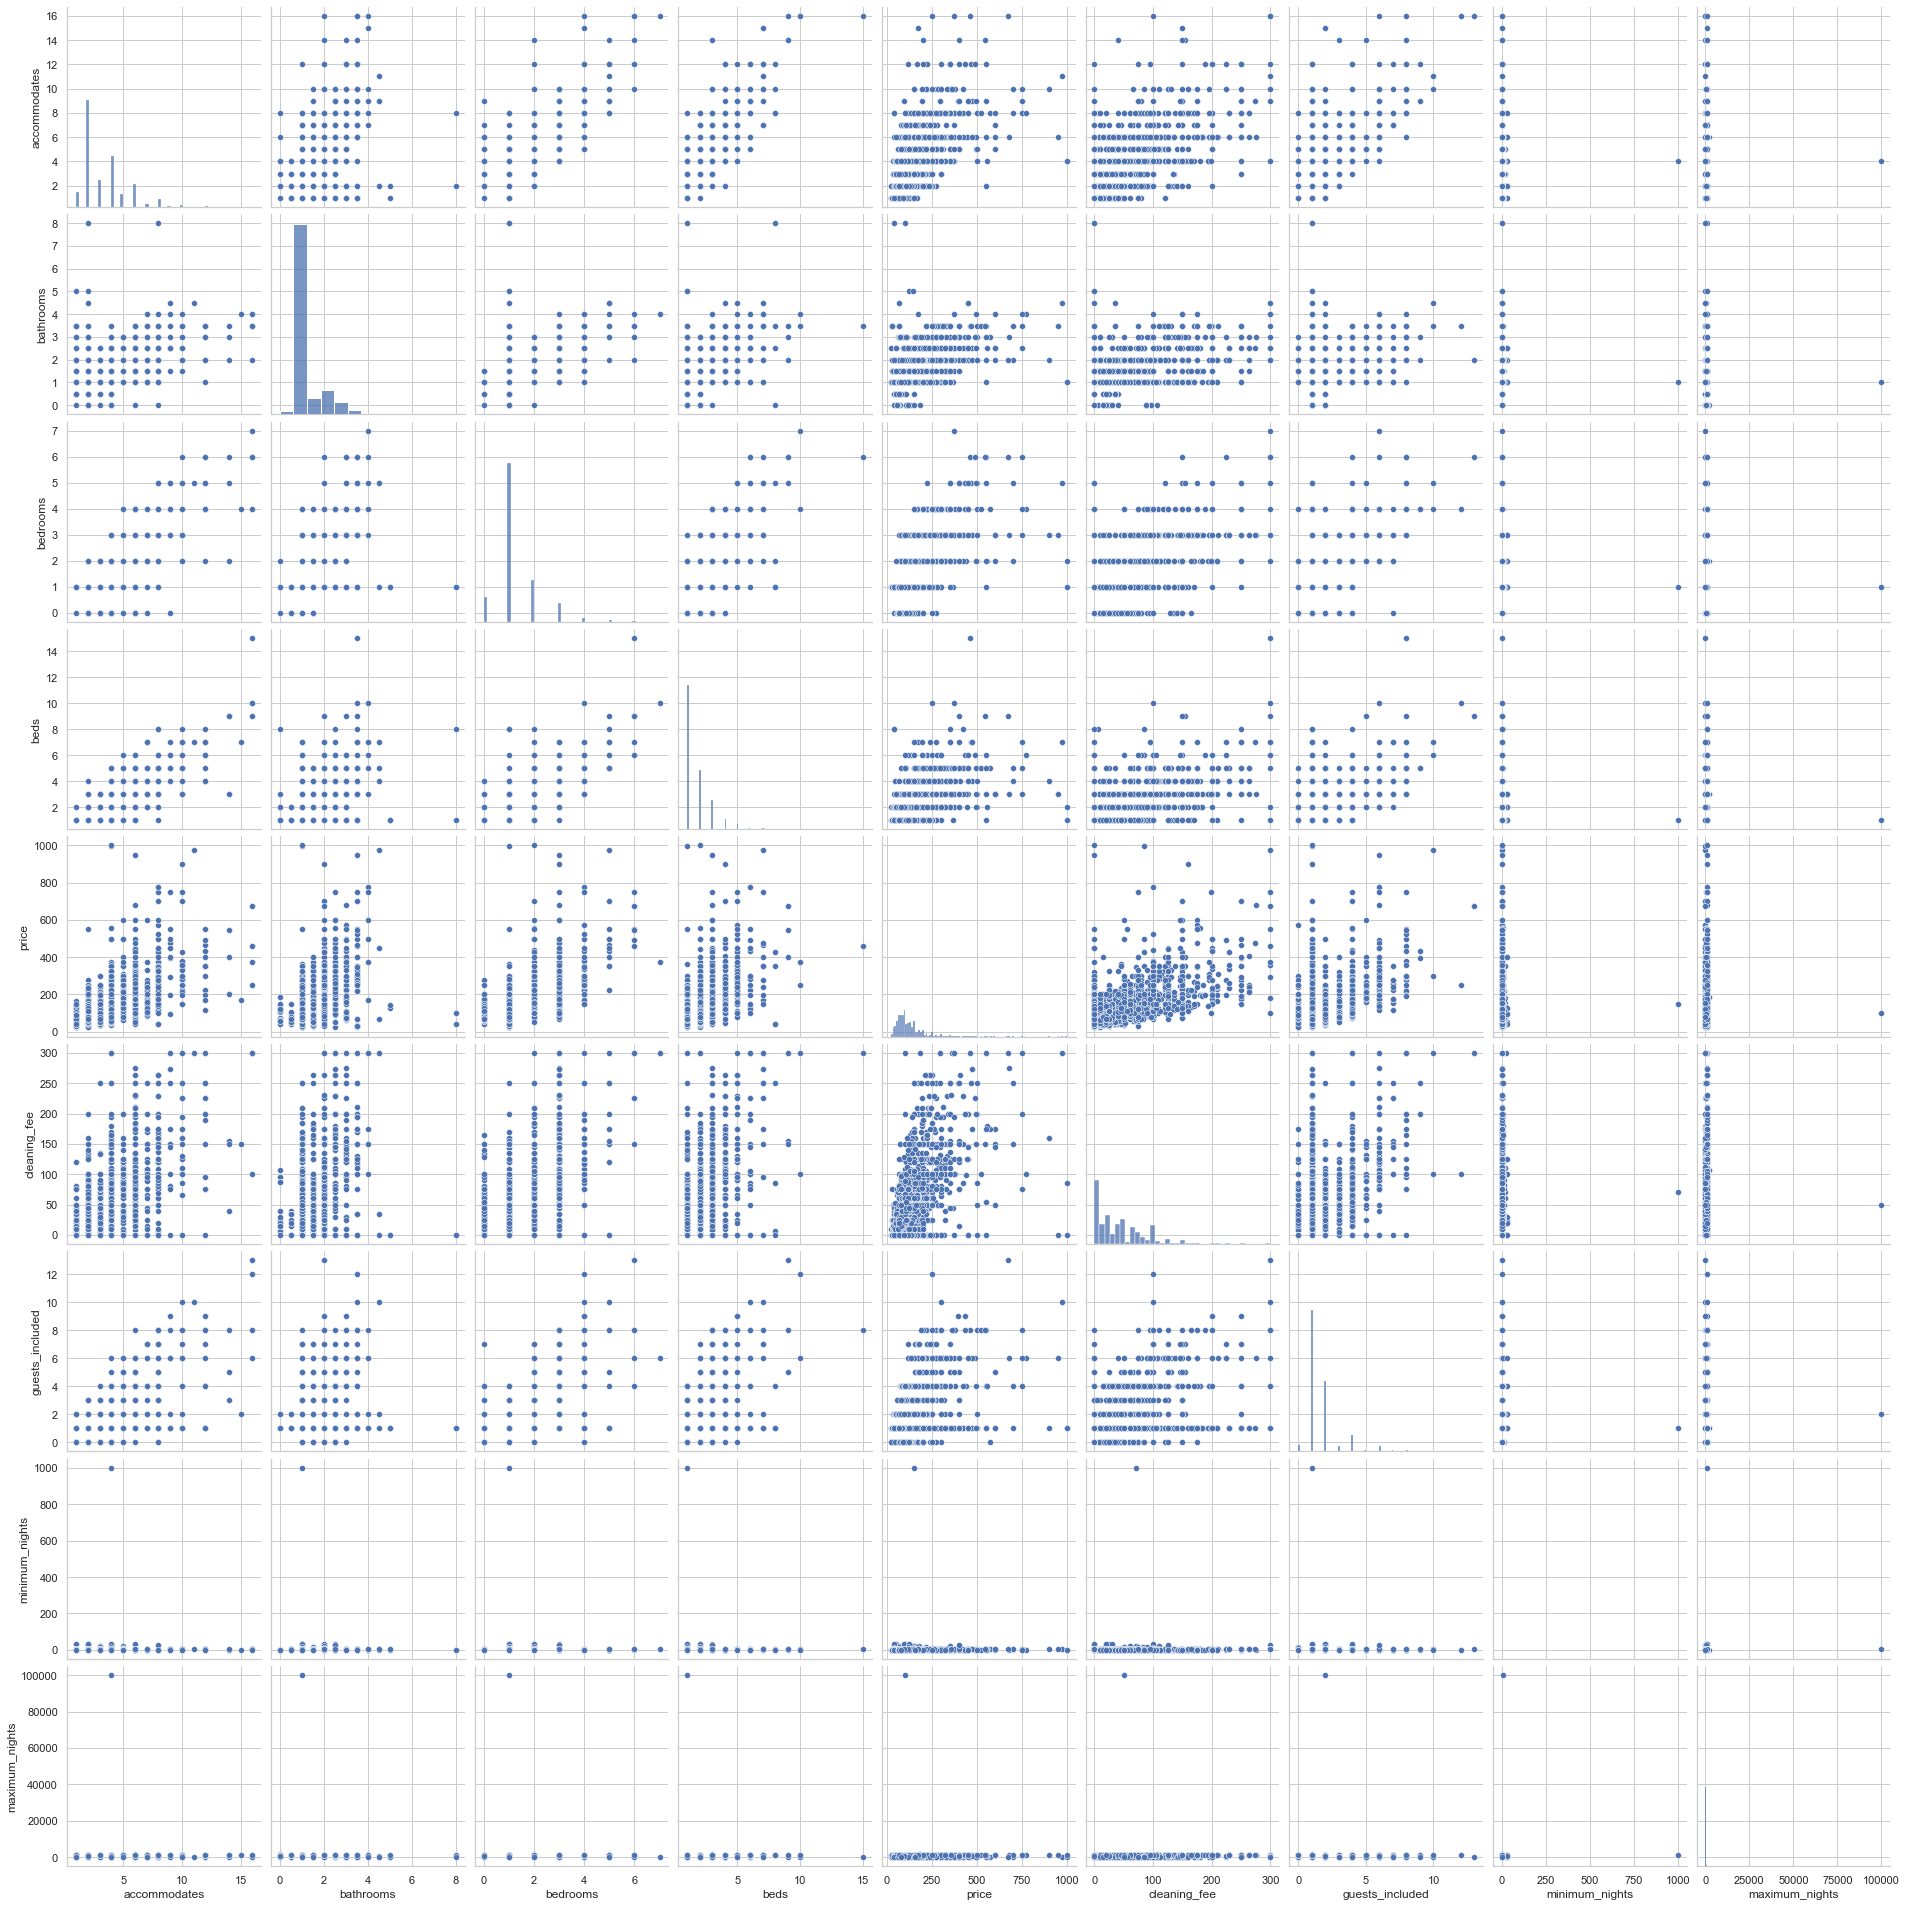

In [144]:
sns.set(style = 'whitegrid',context = 'notebook')
sns.pairplot(listing[col_corr],height=3)
plt.show()

In [145]:
def find_more_imp_features(df,columns):
    X = df[columns]  #independent columns
    y = df['price']    #target column i.e price range
    from sklearn.ensemble import ExtraTreesClassifier
    model = ExtraTreesClassifier()
    model.fit(X,y)
    print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
    #plot graph of feature importances for better visualization
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(len(columns)).plot(kind='barh')
    plt.show()

[0.09442346 0.07735606 0.03949585 0.05730006 0.29238181 0.08382322
 0.15762834 0.19759119]


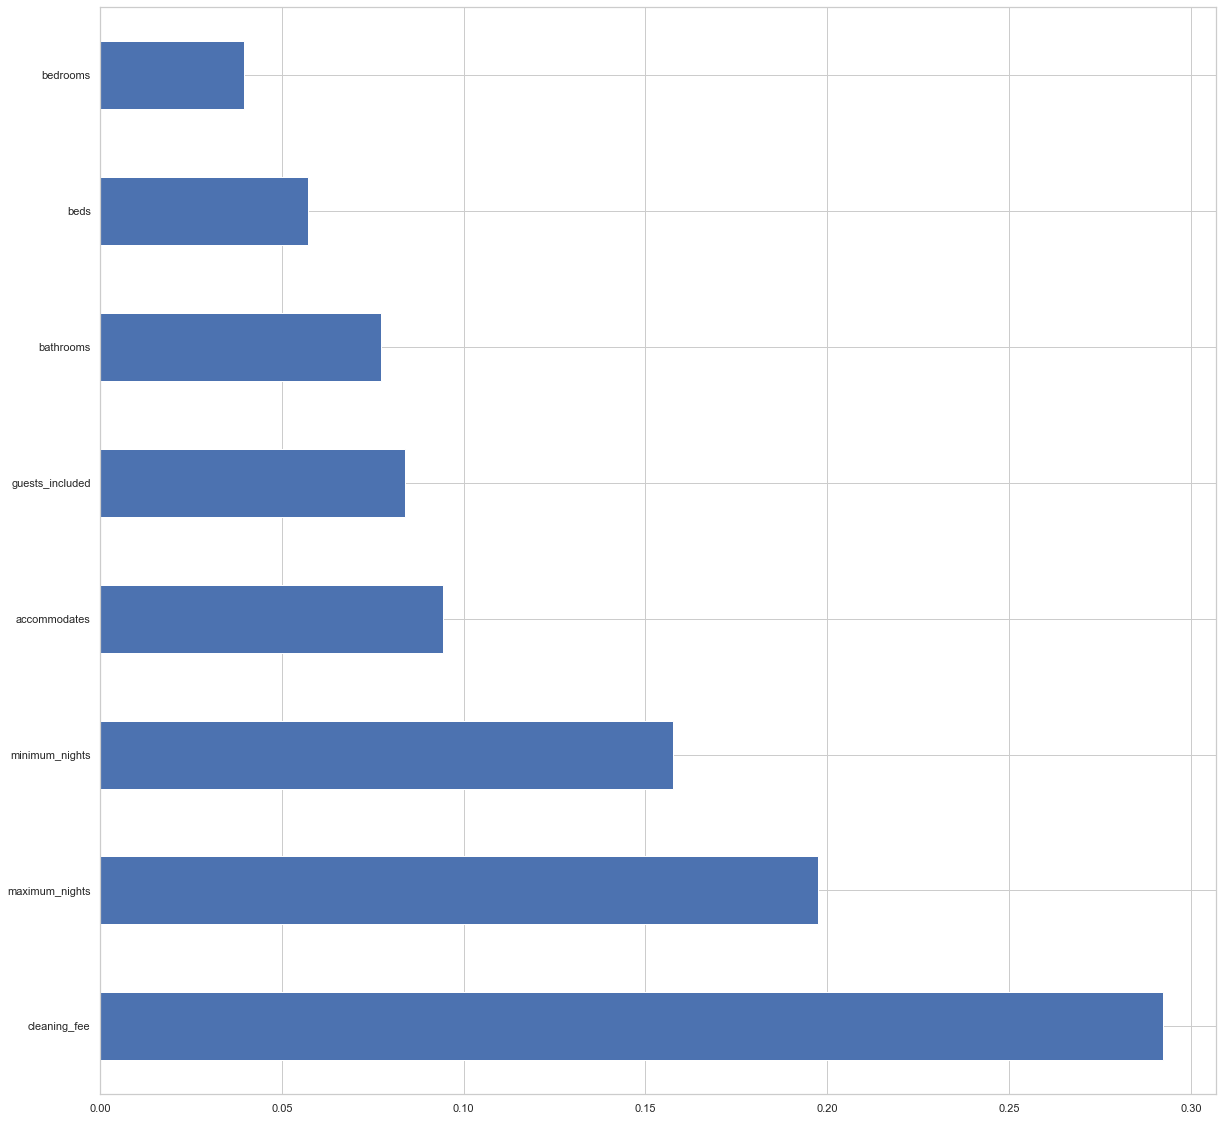

In [146]:
col_corr.remove("price")
find_more_imp_features(listing,col_corr)

In [149]:
def find_top_k_features(df,columns):
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import chi2
    X = df[columns]  # independent columns
    y = df['price']    #target column i.e price range
    #apply SelectKBest class to extract top 10 best features
    bestfeatures = SelectKBest(score_func=chi2, k=len(columns))
    fit = bestfeatures.fit(X,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    #concat two dataframes for better visualization
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
    print(featureScores.nlargest(len(X),'Score'))  #print 10 best features

In [150]:
find_top_k_features(listing,col_corr)

             Specs          Score
7   maximum_nights  203919.933259
4     cleaning_fee   86811.594705
6   minimum_nights    3730.677608
0     accommodates    2115.163984
3             beds    1243.981208
5  guests_included    1129.050524
2         bedrooms    1020.109933
1        bathrooms     404.085550


In [151]:
def train_linear_model(listing,col_corr):
    X_train, X_test, y_train, y_test = train_test_split(listing[col_corr], listing['price'], test_size = 0.25, random_state=1)
    model = linear_model.LinearRegression()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    r2_test = r2_score(y_test,y_test_pred)
    print("R2 error: {}".format(r2_test))
    # plot residuals
    plt.scatter(y_train_pred,  y_train_pred - y_train,
                c='blue', marker='o', label='Training data')
    plt.scatter(y_test_pred,  y_test_pred - y_test,
                c='lightgreen', marker='s', label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.show()


R2 error: 0.5229447280113633


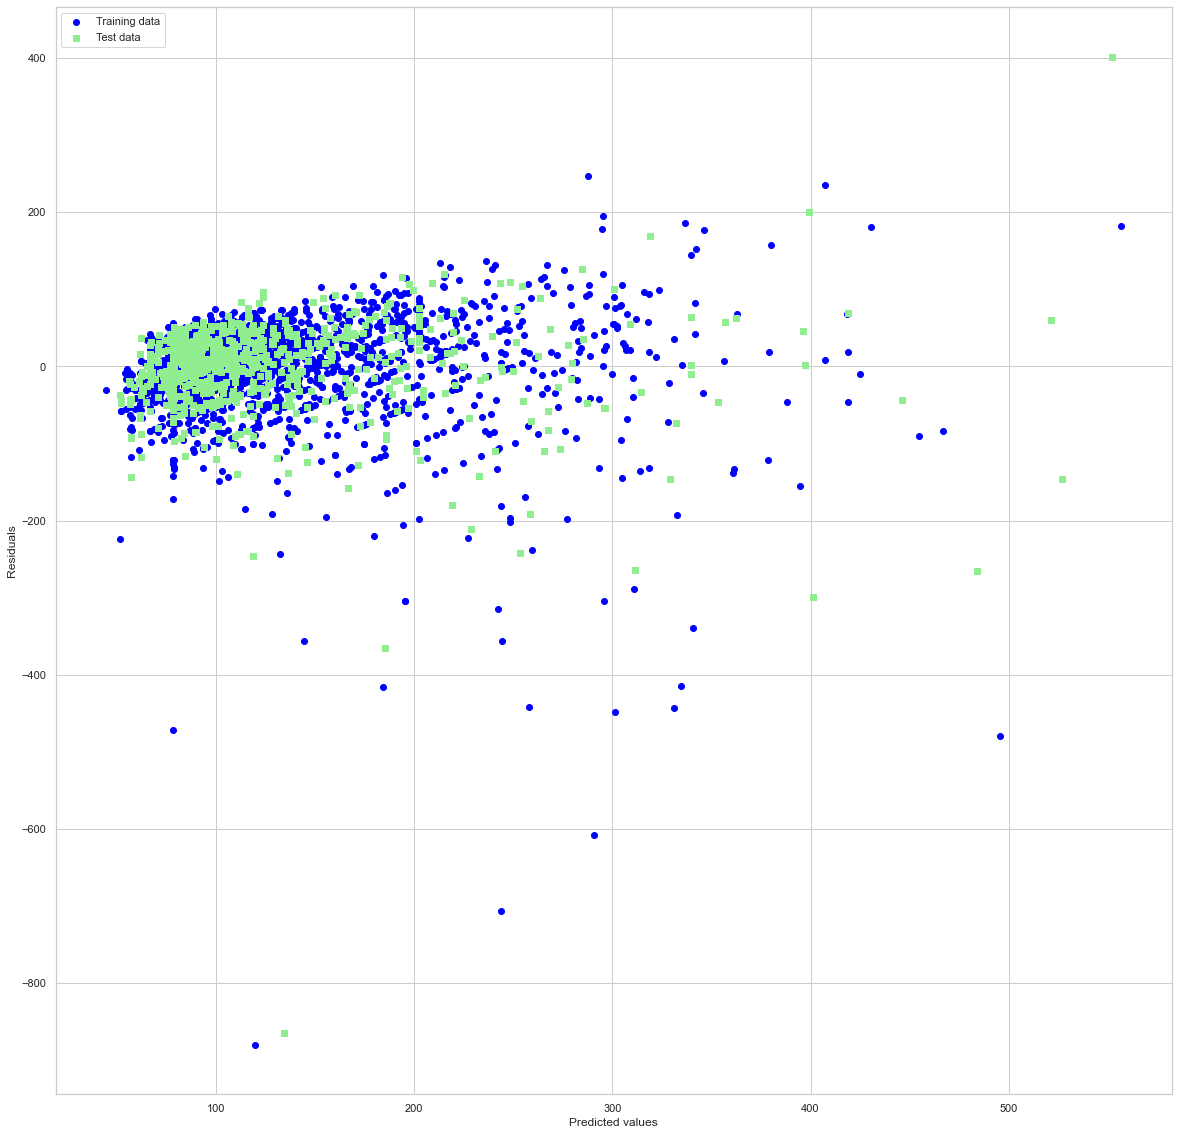

In [152]:
train_linear_model(listing,col_corr)

Extract the information from the amenities list to check if some of them are important factors to determine the price

In [153]:
def plot_distribution(dataset,columns):
    import math
    columns_graph = 3
    fig, axes = plt.subplots(math.ceil(len(columns)/columns_graph), columns_graph,figsize=(30, 12), sharey=False)
    fig.suptitle('Data distribution in the dataset')
    t=-1
    for i,c in enumerate(columns):
        if i%columns_graph == 0:
            t+=1
        sns.histplot(ax=axes[t, i%columns_graph], data=dataset[c])
        #axes[t, i%columns_graph].set_title(c)

    plt.show()

In [154]:
#from scipy import stats
#col=col_corr.copy()
#col.append("price")
#new_l=listing[col].copy()
#train_linear_model(new_l[(np.abs(stats.zscore(new_l)) < 3).all(axis=1)],col_corr)

In [155]:
#plot_distribution(listing,col)

In [156]:
#new_l[(np.abs(stats.zscore(new_l)) < 3).all(axis=1)]

In [157]:
#plot_distribution(new_l[(np.abs(stats.zscore(new_l)) < 5).all(axis=1)],col)

In [158]:
import re
amenities=pd.DataFrame()
amenities=listing[['id','amenities']]
amenities=amenities.set_index('id')
amenities['amenities'] = amenities['amenities'].apply(lambda x: re.sub('[{}]', '', x))
amenities['amenities'] = amenities['amenities'].apply(lambda x: re.sub('"', '', x))
amenities.head()

,amenities
id,
241032,"TV,Cable TV,Internet,Wireless Internet,Air Con..."
953595,"TV,Internet,Wireless Internet,Kitchen,Free Par..."
3308979,"TV,Cable TV,Internet,Wireless Internet,Air Con..."
278830,"TV,Cable TV,Internet,Wireless Internet,Kitchen..."
5956968,"Wireless Internet,Free Parking on Premises,Hea..."


In [159]:
dumm_variables_df = amenities['amenities'].str.get_dummies(sep=',')
dumm_variables_df

,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
id,,,,,,,,,,,,,,,,,,,,,
241032,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
953595,0,0,0,1,0,1,0,0,0,1,...,1,0,1,0,0,1,1,0,0,1
3308979,0,1,0,0,1,1,1,1,0,1,...,0,1,1,0,0,1,1,0,0,1
278830,0,0,0,0,1,1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
5956968,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262764,1,0,0,0,1,1,1,0,0,1,...,1,1,1,0,0,1,1,0,0,1
8578490,0,1,0,0,1,0,0,0,0,1,...,1,1,1,0,0,1,1,0,0,1
3383329,1,0,0,0,0,1,0,0,0,1,...,0,1,1,0,0,0,1,0,0,1


In [160]:
id_price_df = listing[["id","price"]].set_index("id")
joint_amenities=pd.concat([id_price_df,dumm_variables_df], axis=1, join='inner')
joint_amenities.head()

,price,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
id,,,,,,,,,,,,,,,,,,,,,
241032,85.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
953595,150.0,0,0,0,1,0,1,0,0,0,...,1,0,1,0,0,1,1,0,0,1
3308979,975.0,0,1,0,0,1,1,1,1,0,...,0,1,1,0,0,1,1,0,0,1
278830,450.0,0,0,0,0,1,1,0,0,0,...,0,1,1,0,0,1,0,0,0,1
5956968,120.0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1


In [161]:
amenities_sum_df=dumm_variables_df.sum().sort_values(ascending=False).reset_index()
amenities_sum_df.head()

,index,0
0,Wireless Internet,3080
1,Heating,3047
2,Kitchen,2861
3,Smoke Detector,2766
4,Essentials,2726


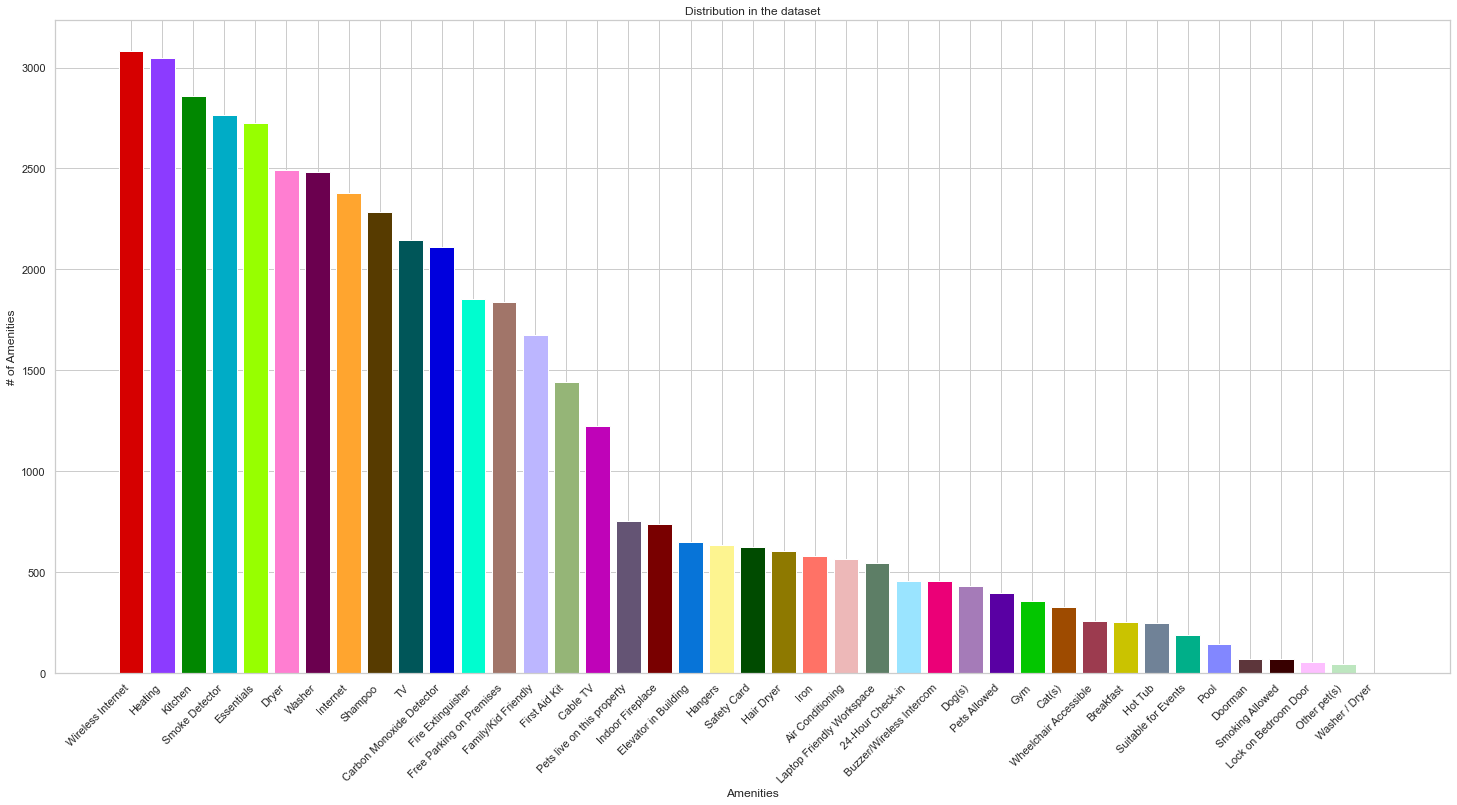

In [162]:
fig, ax = plt.subplots(figsize=(25,12))
rgb_values = sns.color_palette(cc.glasbey, len(amenities_sum_df))
ax.bar(amenities_sum_df['index'], amenities_sum_df[0], color=rgb_values)
ax.set_xlabel('Amenities')
ax.set_ylabel('# of Amenities')
ax.set_title('Distribution in the dataset')
plt.xticks(rotation=45,ha='right')
plt.show()

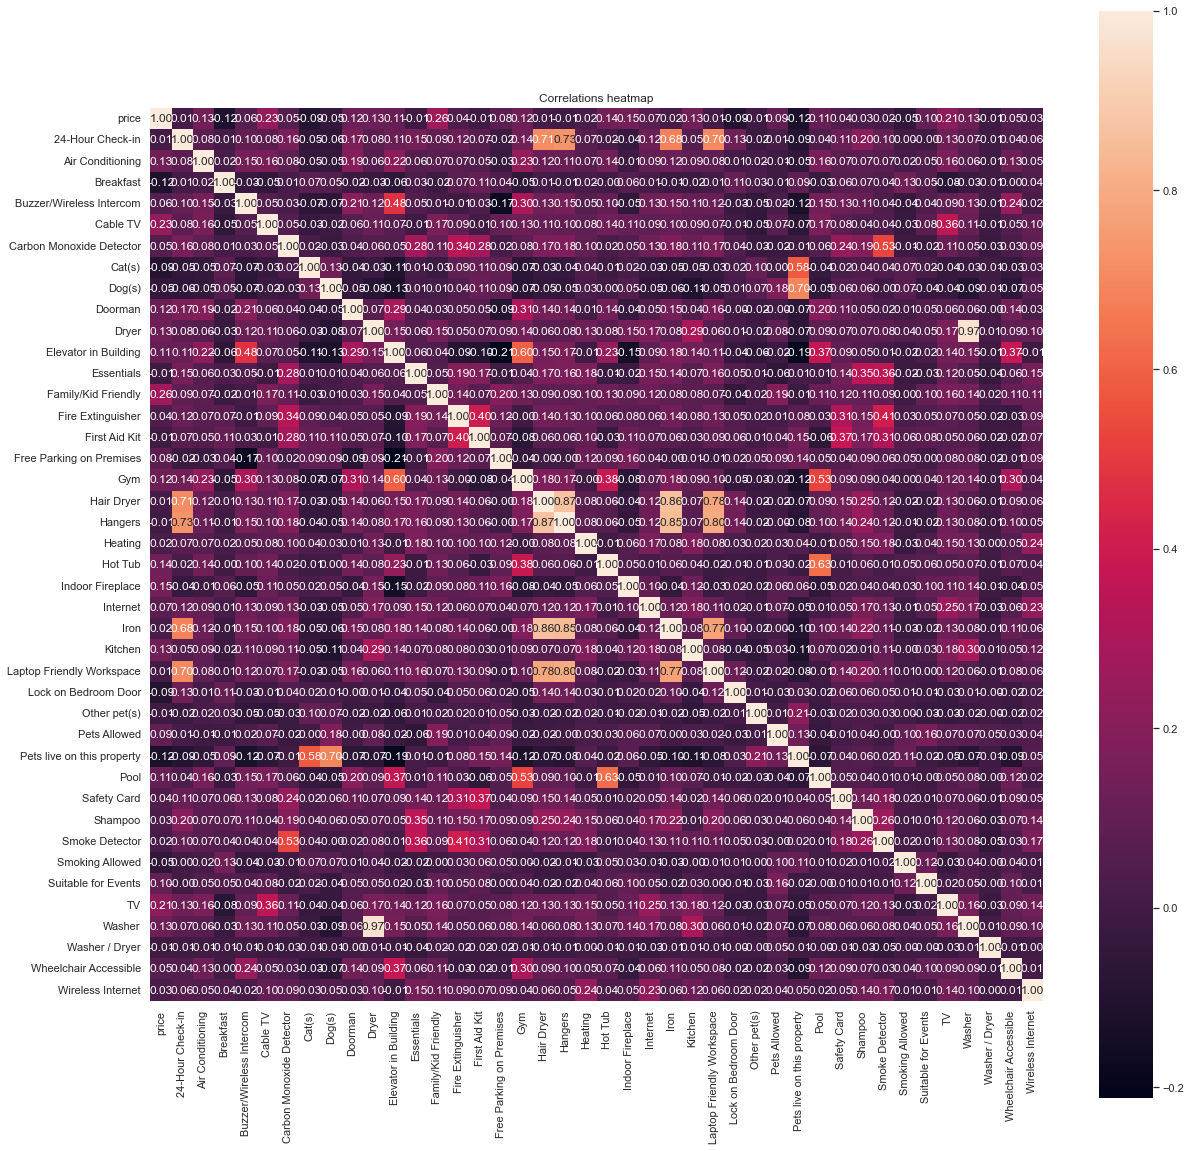

In [163]:
coulms_list = list(joint_amenities)
c_matrix=correlation_matrix(joint_amenities,coulms_list,"base")

[2.71521976e-01 1.32613943e-02 2.48051575e-02 1.65634405e-02
 1.80606757e-02 2.19314625e-02 3.25630334e-02 1.28579149e-02
 1.54632993e-02 4.51089016e-03 1.83541662e-02 1.42408319e-02
 2.43071184e-02 2.64226787e-02 3.77765446e-02 3.62360072e-02
 4.07947819e-02 1.13804429e-02 1.19951003e-02 1.21342895e-02
 9.36109063e-03 1.35567028e-02 2.56212856e-02 3.37755857e-02
 1.27142423e-02 1.32195005e-02 1.39064668e-02 4.82602537e-03
 3.86524284e-03 2.47136140e-02 1.54759719e-02 5.44605849e-03
 2.91526723e-02 3.05373743e-02 1.73749865e-02 5.27383792e-03
 1.22469639e-02 2.17391079e-02 1.89894385e-02 1.34981958e-04
 1.59270566e-02 6.96058694e-03]


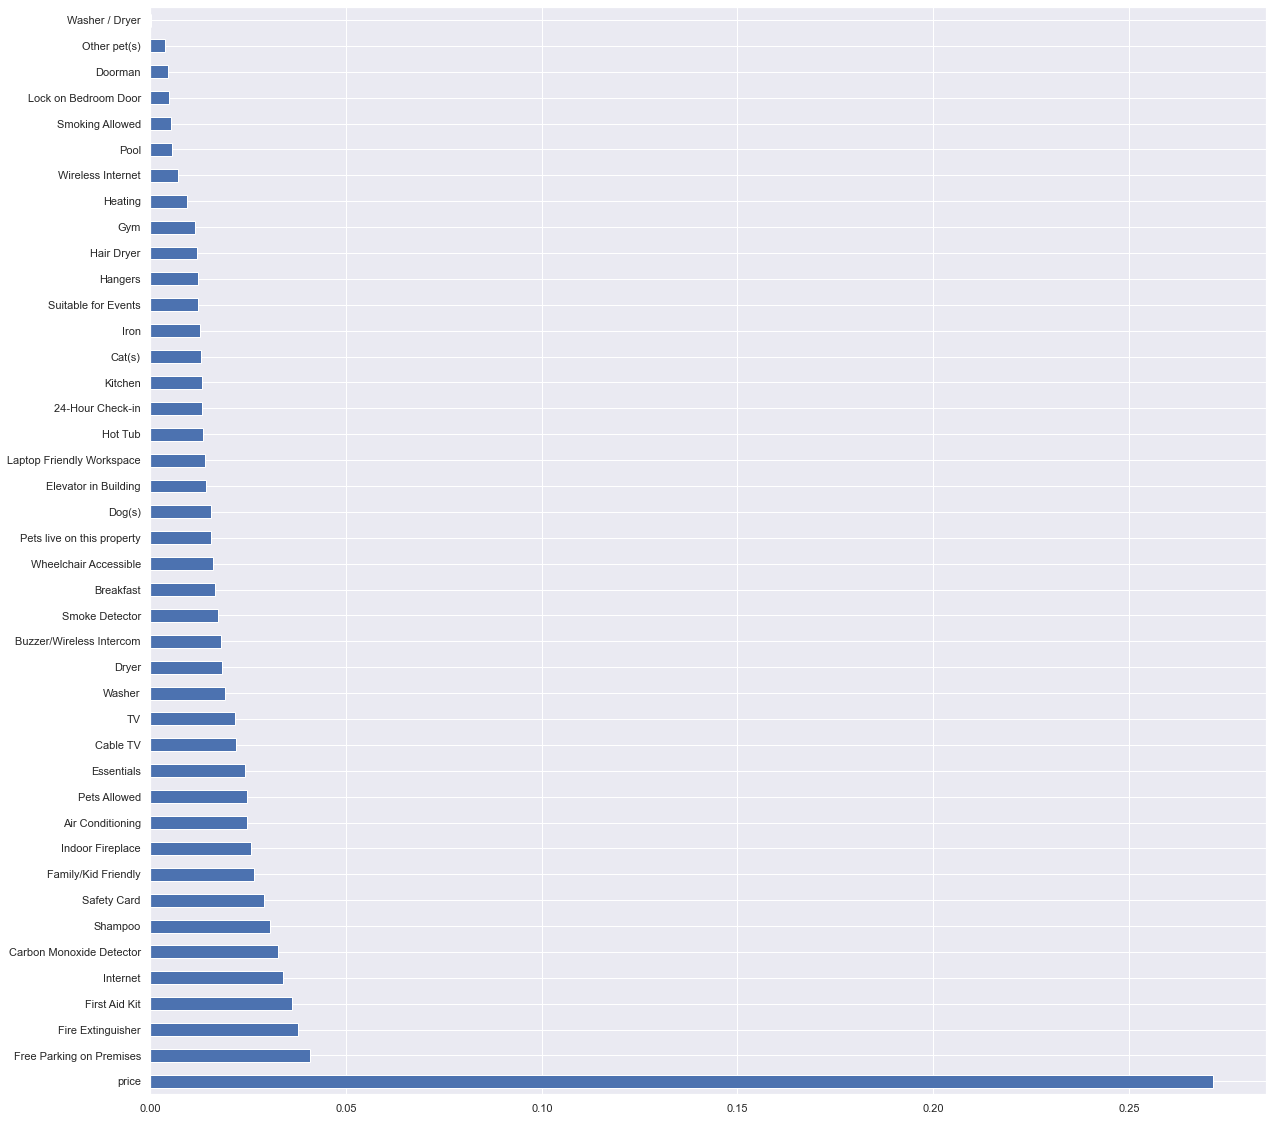

In [164]:
x=find_more_imp_features(joint_amenities,coulms_list)

In [165]:
find_top_k_features(joint_amenities,coulms_list)

                         Specs          Score
0                        price  202528.144276
31                        Pool     644.934816
9                      Doorman     642.257958
17                         Gym     545.118231
21                     Hot Tub     524.832241
11        Elevator in Building     430.135311
36         Suitable for Events     388.302945
2             Air Conditioning     365.988543
22            Indoor Fireplace     344.937803
5                     Cable TV     333.679726
3                    Breakfast     333.551621
4     Buzzer/Wireless Intercom     331.290767
1             24-Hour Check-in     327.229776
24                        Iron     326.975190
18                  Hair Dryer     308.814398
40       Wheelchair Accessible     301.923276
19                     Hangers     299.867466
30  Pets live on this property     287.130252
26   Laptop Friendly Workspace     265.631687
27        Lock on Bedroom Door     264.575274
13         Family/Kid Friendly    

R2 error: 1.0


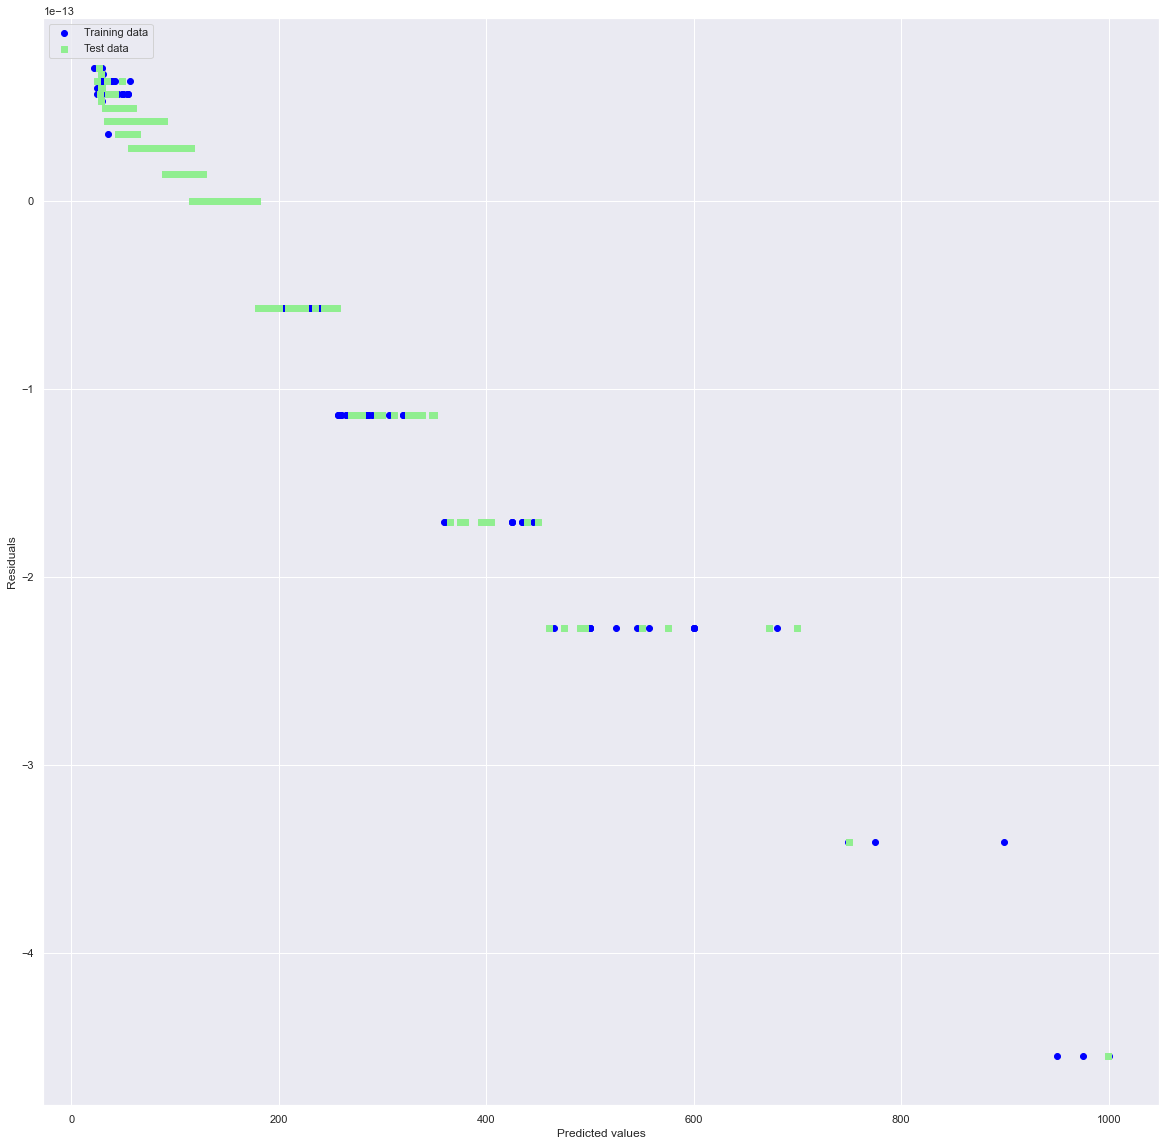

In [166]:
train_linear_model(joint_amenities,coulms_list)